# Correlations

One correlation for bubble history of direct contact condensation of vapor bubbles in a subcooled liquid such considers a stagnant bubble in liquid dominated by heat transfer, which can be represented as

```{math}
\beta = 1 - 4Ja\sqrt\frac{Fo_0}{\pi}
```

where {math}`\beta` is the dimensionless bubble diameter {math}`D/D_0` with {math}`D_0` being the initial bubble diameter, {math}`Ja` is the Jakob number {math}`\rho_l c_{pl}\Delta T_{sub}/\rho_v h_{fg}` , and {math}`Fo_0` is the Fourier number {math}`\alpha t/D_{b0}^2` .{footcite}`tangReviewDirectContact2022`{footcite}`florschuetzMechanicsVaporBubble1965`


In [ ]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from boilercv.correlations import (
    dimensionless_bubble_diameter_florschuetz_chao_1965,
    fourier,
    jakob,
)
from boilercv.format import set_format
from boilercv.models.params import PARAMS

set_format()
_ = display()
# This warning fires unnecessarily when Seaborn or Pandas plots are placed in existing
# axes. This warning can't be caught in context of `warnings.catch_warnings()` because
# it fires *after* a cell finishes executing. So we have to disable this globally.
warnings.filterwarnings(
    category=UserWarning,
    action="ignore",
    message="This figure includes Axes that are not compatible with",
)
sns.set_theme(
    context="notebook",
    style="whitegrid",
    palette="bright",
    font="sans-serif",
)
plt.style.use(style=PARAMS.project_paths.mpl_base)


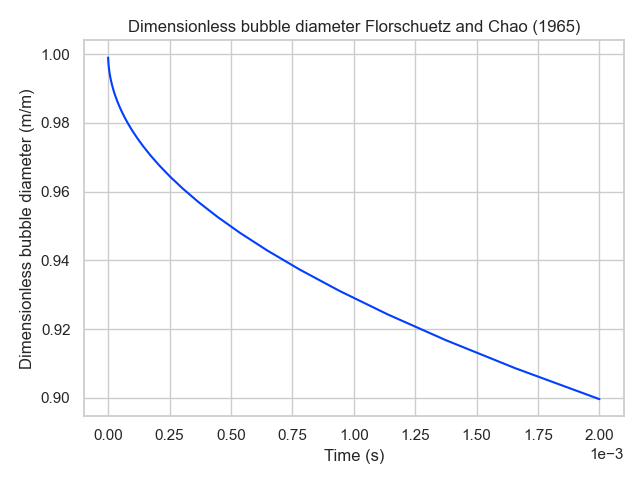

In [ ]:
time = "Time (s)"
dimensionless_bubble_diameter = "Dimensionless bubble diameter (m/m)"

sns.lineplot(
    data=(
        pd.DataFrame({time: np.logspace(-6, -2) / 5})
        .set_index(time)
        .assign(
            **{
                dimensionless_bubble_diameter: lambda df: dimensionless_bubble_diameter_florschuetz_chao_1965(
                    jakob(
                        liquid_density=1000,  # kg/m^3
                        vapor_density=0.804,  # kg/m^3
                        liquid_specific_heat=4180,  # J/kg-K
                        subcooling=2,  # K
                        latent_heat_of_vaporization=2.23e6,  # J/kg
                    ),
                    fourier(
                        thermal_diffusivity=1.43e-7,  # m^2/s
                        time=df.index,  # s
                        initial_bubble_diameter=0.001,  # m
                    ),
                )
            }
        )
    ),
    x=time,
    y=dimensionless_bubble_diameter,
).set_title("Dimensionless bubble diameter Florschuetz and Chao (1965)")

_


## References

```{footbibliography}

```
